<a href="https://colab.research.google.com/github/rajibmondal/Advanced-Machine-Learning-Specialization/blob/master/Fashon%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import os

import distutils
if distutils.version.LooseVersion(tf.__version__) <= '2.0':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

    8192/26421880 [..............................] - ETA: 0s

<ipython-input-1-04e60d1ee9ed>:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(tf.__version__) <= '2.0':


4422102/4422102 [==============================] - 0s 0us/step


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [14]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

IndexError: index 0 is out of bounds for axis 0 with size 0

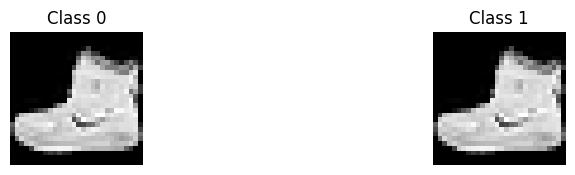

In [32]:
plt.figure(figsize=(10, 10))
for i in range(10):
    idx = np.where(train_labels == i)[0][0]
    plt.subplot(5, 2, i + 1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(f'Class {i}')
    plt.axis('off')
plt.show()

In [15]:
# Normalize the images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
# Reshape images for CNN input and one-hot encode the labels
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [17]:
# Model 1: Shallow Neural Network
model_1 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
# Model 2: Basic CNN
model_2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
# Model 3: Deeper CNN
model_3 = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [20]:
# Compile models
for model in [model_1, model_2, model_3]:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [21]:
# Train models
history_1 = model_1.fit(train_images, train_labels, epochs=10, validation_split=0.2)
history_2 = model_2.fit(train_images, train_labels, epochs=10, validation_split=0.2)
history_3 = model_3.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5171 - accuracy: 0.8196 - val_loss: 0.4127 - val_accuracy: 0.8480
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3873 - accuracy: 0.8600 - val_loss: 0.3799 - val_accuracy: 0.8613
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3473 - accuracy: 0.8744 - val_loss: 0.3520 - val_accuracy: 0.8740
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3239 - accuracy: 0.8822 - val_loss: 0.3587 - val_accuracy: 0.8734
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3031 - accuracy: 0.8889 - val_loss: 0.3404 - val_accuracy: 0.8791
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2878 - accuracy: 0.8940 - val_loss: 0.3267 - val_accuracy: 0.8834
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2747 - accuracy: 0.8987 - val_loss: 0.3390 - val_accuracy:

In [25]:
# Evaluate models
def evaluate_model(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(test_labels, axis=1)
    cm = confusion_matrix(true_classes, predicted_classes)
    clr = classification_report(true_classes, predicted_classes)
    return test_acc, cm, clr


In [29]:
true_classes = np.argmax(test_labels, axis=1)

In [26]:
acc_1, cm_1, clr_1 = evaluate_model(model_1, test_images, test_labels)
acc_2, cm_2, clr_2 = evaluate_model(model_2, test_images, test_labels)
acc_3, cm_3, clr_3 = evaluate_model(model_3, test_images, test_labels)

313/313 - 1s - loss: 0.3522 - accuracy: 0.8773 - 500ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step
313/313 - 2s - loss: 0.3278 - accuracy: 0.9149 - 2s/epoch - 5ms/step
313/313 [==============================] - 2s 5ms/step
313/313 - 14s - loss: 0.4377 - accuracy: 0.9176 - 14s/epoch - 46ms/step
313/313 [==============================] - 14s 46ms/step


In [30]:
# Ensemble method: Averaging predictions
predictions_1 = model_1.predict(test_images)
predictions_2 = model_2.predict(test_images)
predictions_3 = model_3.predict(test_images)
ensemble_predictions = (predictions_1 + predictions_2 + predictions_3) / 3
ensemble_predicted_classes = np.argmax(ensemble_predictions, axis=1)
ensemble_cm = confusion_matrix(true_classes, ensemble_predicted_classes)
ensemble_clr = classification_report(true_classes, ensemble_predicted_classes)

313/313 [==============================] - 16s 51ms/step


In [31]:
# Output results
print("Model 1 Accuracy:", acc_1)
print("Model 2 Accuracy:", acc_2)
print("Model 3 Accuracy:", acc_3)
print("Ensemble Accuracy:", np.mean([acc_1, acc_2, acc_3]))
print("Ensemble Confusion Matrix:\n", ensemble_cm)
print("Ensemble Classification Report:\n", ensemble_clr)


Model 1 Accuracy: 0.8773000240325928
Model 2 Accuracy: 0.914900004863739
Model 3 Accuracy: 0.9175999760627747
Ensemble Accuracy: 0.9032666683197021
Ensemble Confusion Matrix:
 [[857   1  15  16   5   0  98   1   7   0]
 [  0 979   0  13   4   0   3   0   1   0]
 [ 12   0 872   9  49   0  58   0   0   0]
 [  9   1   6 950  14   0  19   0   1   0]
 [  0   1  41  31 889   0  37   0   1   0]
 [  0   0   0   0   0 986   0  12   0   2]
 [ 67   0  39  27  53   0 809   0   5   0]
 [  0   0   0   0   0   7   0 983   0  10]
 [  4   0   1   4   2   1   5   3 980   0]
 [  0   0   0   0   0   7   1  30   0 962]]
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.90      0.87      0.88      1000
           3       0.90      0.95      0.93      1000
           4       0.88      0.89      0.88      1000
           5       0.99      0.99  

In [33]:
# Build the neural network model
input_layer = layers.Input(shape=x_train.shape[1:])
hidden1 = layers.Dense(30, activation='relu')(input_layer)
batch_norm1 = layers.BatchNormalization()(hidden1)
dropout1 = layers.Dropout(0.5)(batch_norm1)
hidden2 = layers.Dense(30, activation='relu')(dropout1)
batch_norm2 = layers.BatchNormalization()(hidden2)
dropout2 = layers.Dropout(0.5)(batch_norm2)
concat = layers.Concatenate()([hidden1, hidden2])
output = layers.Dense(10, activation='softmax')(concat)



In [34]:
from tensorflow.keras import layers, models

model = models.Model(inputs=[input_layer], outputs=[output])


In [35]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



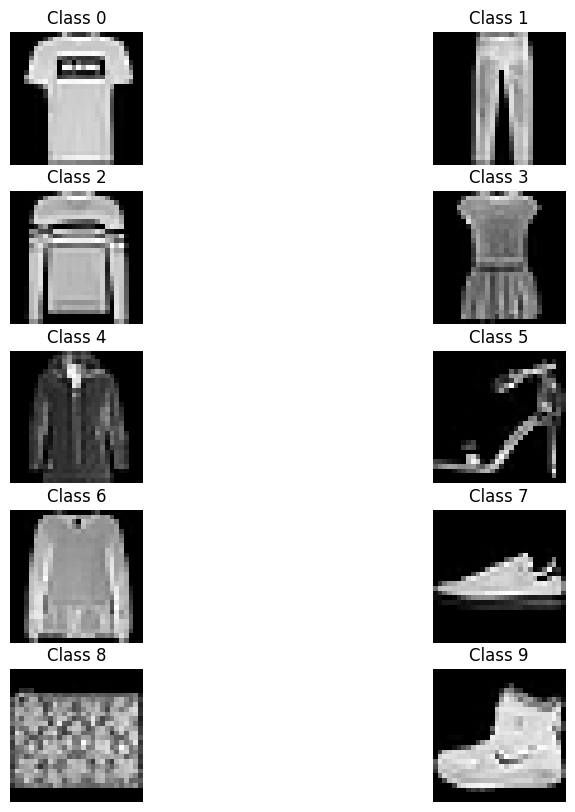

In [5]:
plt.figure(figsize=(10, 10))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f'Class {i}')
    plt.axis('off')
plt.show()